# Daily Temperature Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data Collection


In [ ]:
df = pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/daily temperature.csv')
df.shape

(6574, 9)

In [4]:
df.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [5]:
df.describe()

,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
count,6574.000000,6574.000000,6574.000000,6513.000000,5953.000000,6513.000000,5900.000000,6214.000000
mean,9.796834,0.391542,1.885169,0.356364,13.339123,0.464456,6.411678,2.736547
std,4.977272,1.179092,4.030529,1.128552,4.890546,1.177571,4.637243,5.569175
min,0.000000,0.000000,0.000000,0.000000,-0.100000,0.000000,-11.500000,-14.400000
25%,6.000000,0.000000,0.000000,0.000000,9.600000,0.000000,3.000000,-1.000000
50%,9.210000,0.000000,0.200000,0.000000,13.300000,0.000000,6.500000,3.000000
75%,12.960000,0.000000,2.000000,0.000000,17.200000,0.000000,10.000000,7.000000
max,30.370000,4.000000,67.000000,4.000000,26.800000,4.000000,18.000000,15.800000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6574 entries, 0 to 6573
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     6574 non-null   object 
 1   WIND     6574 non-null   float64
 2   IND      6574 non-null   int64  
 3   RAIN     6574 non-null   float64
 4   IND.1    6513 non-null   float64
 5   T.MAX    5953 non-null   float64
 6   IND.2    6513 non-null   float64
 7   T.MIN    5900 non-null   float64
 8   T.MIN.G  6214 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 462.4+ KB


## Data Preprocessing and Exploration



In [7]:
df['DATE'] = pd.to_datetime(df['DATE'])

# Identify numerical columns with missing values
numerical_cols_with_missing = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isnull().any()].tolist()

# Fill missing values in numerical columns with the mean
for col in numerical_cols_with_missing:
    df[col] = df[col].fillna(df[col].mean())

print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64


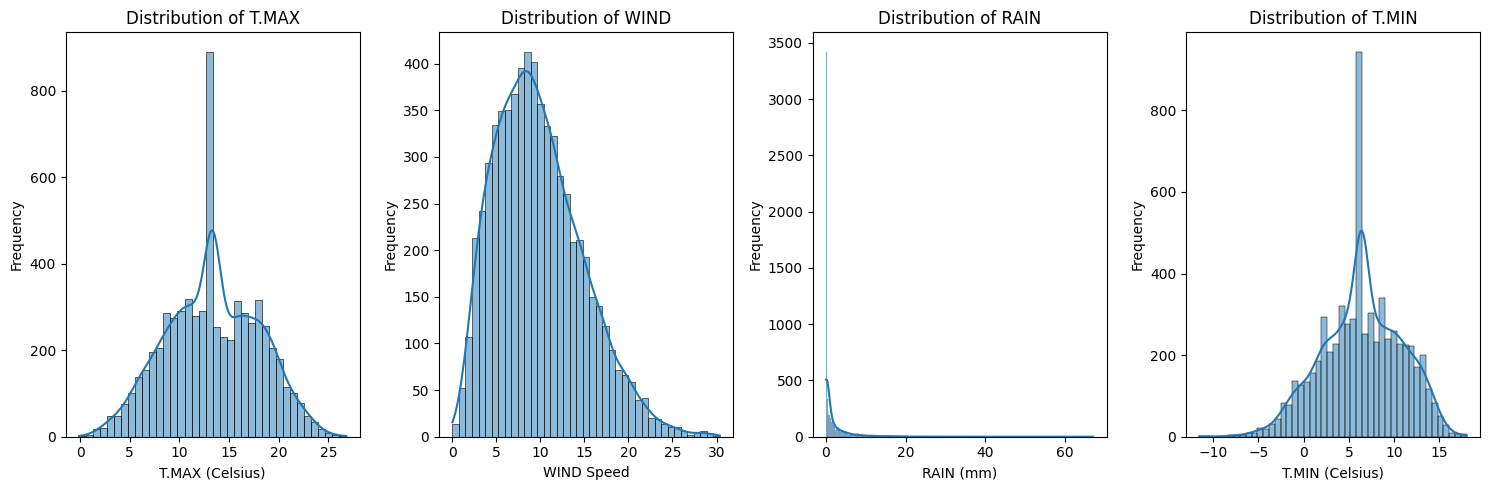

In [9]:
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.histplot(df['T.MAX'], kde=True)
plt.title('Distribution of T.MAX')
plt.xlabel('T.MAX (Celsius)')
plt.ylabel('Frequency')

plt.subplot(1, 4, 2)
sns.histplot(df['WIND'], kde=True)
plt.title('Distribution of WIND')
plt.xlabel('WIND Speed')
plt.ylabel('Frequency')

plt.subplot(1, 4, 3)
sns.histplot(df['RAIN'], kde=True)
plt.title('Distribution of RAIN')
plt.xlabel('RAIN (mm)')
plt.ylabel('Frequency')

plt.subplot(1, 4, 4)
sns.histplot(df['T.MIN'], kde=True)
plt.title('Distribution of T.MIN')
plt.xlabel('T.MIN (Celsius)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Feature Engineering



In [10]:
df['year'] = df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day'] = df['DATE'].dt.day
df['dayofweek'] = df['DATE'].dt.dayofweek

df['T.MAX_lag1'] = df['T.MAX'].shift(1).fillna(df['T.MAX'].mean())

print("DataFrame after adding new features:")
print(df.head())

DataFrame after adding new features:
        DATE   WIND  IND  RAIN  IND.1  T.MAX  IND.2  T.MIN  T.MIN.G  year  \
0 1961-01-01  13.67    0   0.2    0.0    9.5    0.0    3.7     -1.0  1961   
1 1961-01-02  11.50    0   5.1    0.0    7.2    0.0    4.2      1.1  1961   
2 1961-01-03  11.25    0   0.4    0.0    5.5    0.0    0.5     -0.5  1961   
3 1961-01-04   8.63    0   0.2    0.0    5.6    0.0    0.4     -3.2  1961   
4 1961-01-05  11.92    0  10.4    0.0    7.2    1.0   -1.5     -7.5  1961   

   month  day  dayofweek  T.MAX_lag1  
0      1    1          6   13.339123  
1      1    2          0    9.500000  
2      1    3          1    7.200000  
3      1    4          2    5.500000  
4      1    5          3    5.600000  


## Data Splitting



In [11]:
X = df[['WIND', 'RAIN', 'T.MIN', 'year', 'month', 'day', 'dayofweek', 'T.MAX_lag1']]
y = df['T.MAX']

split_index = int(len(df) * 0.8)

X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train = y.iloc[:split_index]
y_test = y.iloc[split_index:]

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (5259, 8)
Shape of X_test: (1315, 8)
Shape of y_train: (5259,)
Shape of y_test: (1315,)


## Model Training




In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


## Prediction and Evaluation




In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 1.63
Mean Squared Error (MSE): 4.28
R-squared (R2) Score: 0.85


## Visualize Predictions



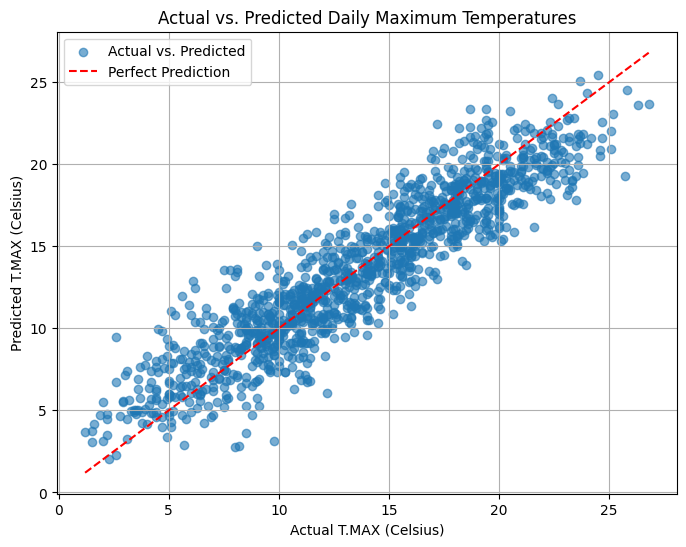

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, label='Actual vs. Predicted')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

plt.xlabel('Actual T.MAX (Celsius)')
plt.ylabel('Predicted T.MAX (Celsius)')
plt.title('Actual vs. Predicted Daily Maximum Temperatures')
plt.legend()
plt.grid(True)
plt.show()